<a href="https://colab.research.google.com/github/HHansi/Applied-AI-Course/blob/main/Data_Cleaning_and_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem

**Can we predict the type of the house or its floor area, knowing the number of family members and income?**

Before considering how machine learning can be used to solve this problem, let's be familiar with the available data set.

In [1]:
# Import libraries
import pandas as pd

# Load Data

In [25]:
'''
Load the data set
Pandas read_csv() function reads a comma-separated values (csv) file into DataFrame.
As the parameter, the file path should be provided. Additionally, GitHub URL can also be provided as follows.
'''
df = pd.read_csv("https://raw.githubusercontent.com/HHansi/Machine-Learning-CPD-Course/main/Data/home_data.csv")
df.head(5)  # see first 5 rows of the DataFrame

,homeid,install_type,location,residents,income_band,hometype,floorarea
0,47,standard,Edinburgh,2,NaN,flat,427
1,59,standard,Edinburgh,2,"£90,000 or more",flat,760
2,61,enhanced,Edinburgh,2,"£48,600 to £53,999",house_or_bungalow,685
3,62,enhanced,Edinburgh,2,"£43,200 to £48,599",flat,815
4,64,standard,Edinburgh,4,"£66,000 to £77,999",flat,650


## Description of the Data Set
As can be seen in the above output (first 5 rows of the data set), this data set consists of 7 columns describing different household compositions with the space.


*   homeid - unique id assigned to each home
*   install_type - home installation type
*   location - home location
*   residents - number of residents in the home
*   income_band - income of the residents formatted into a set of categories/bands
*   hometype - type of the home
*   floorarea - total floor area of the home covering all rooms


(This data set is taken from [IDEAL Household Energy Dataset](https://datashare.ed.ac.uk/handle/10283/3647).)

In [26]:
'''
Print a concise summary of a DataFrame.
Pandas info() function prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.
'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   homeid        255 non-null    int64 
 1   install_type  255 non-null    object
 2   location      255 non-null    object
 3   residents     255 non-null    int64 
 4   income_band   245 non-null    object
 5   hometype      255 non-null    object
 6   floorarea     255 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 14.1+ KB


In [27]:
# Get number of rows and columns
df.shape

(255, 7)

In [28]:
'''
Print a statistical summary of a DataFrame.
Pandas describe() function generates descriptive statistics.
'''
df.describe()

,homeid,residents,floorarea
count,255.000000,255.000000,255.000000
mean,198.901961,2.443137,848.360784
std,80.249918,1.137973,291.104459
min,47.000000,0.000000,325.000000
25%,133.500000,2.000000,645.000000
50%,201.000000,2.000000,805.000000
75%,267.500000,3.000000,1007.500000
max,335.000000,5.000000,1865.000000


In [29]:
# Get number of unique values in each column
df.nunique()

homeid          255
install_type      2
location          5
residents         6
income_band      15
hometype          2
floorarea       147
dtype: int64

In [30]:
# Find if the data set contains Null/NaN values
df.isna().sum()

homeid           0
install_type     0
location         0
residents        0
income_band     10
hometype         0
floorarea        0
dtype: int64

# Data Cleaning

The above output shows that the data set has null/ missing values which we need to remove during the cleaning process. Before that, let's remove additional columns in the DataFrame which are not useful for the targeted problem to simplyfy the DataFrame.


In [31]:
'''
Remove columns installation_type and location from the DataFrame. 
Pandas drop() function removes specified labels from rows or columns.
'''
filtered_df = df.drop(['install_type', 'location'], axis=1) 
filtered_df.head(5)

,homeid,residents,income_band,hometype,floorarea
0,47,2,NaN,flat,427
1,59,2,"£90,000 or more",flat,760
2,61,2,"£48,600 to £53,999",house_or_bungalow,685
3,62,2,"£43,200 to £48,599",flat,815
4,64,4,"£66,000 to £77,999",flat,650


Same result can also be achieved by selecting the required columns. 

In [32]:
# Select columns homeid, residents, income_band, hometype and floorarea from the DataFrame. 
filtered_df2 = df[['homeid', 'residents', 'income_band', 'hometype', 'floorarea']]
filtered_df2.head(5)

,homeid,residents,income_band,hometype,floorarea
0,47,2,NaN,flat,427
1,59,2,"£90,000 or more",flat,760
2,61,2,"£48,600 to £53,999",house_or_bungalow,685
3,62,2,"£43,200 to £48,599",flat,815
4,64,4,"£66,000 to £77,999",flat,650


In [44]:
'''
Remove all missing values in the DataFrame. 
Pandas dropna() function removes rows and columns with Null/NaN values.
'''
cleaned_df = filtered_df.dropna()
print(cleaned_df.shape)

# Verify whether the cleaned output contains any null values
cleaned_df.isna().sum()

(245, 5)


homeid         0
residents      0
income_band    0
hometype       0
floorarea      0
dtype: int64

In addition to the removal, we can have a closer look at missing values for further analyses. 

In [34]:
# Filter DataFrame rows which do not have income_band details
filtered_df[filtered_df['income_band'].isna()]

,homeid,residents,income_band,hometype,floorarea
0,47,2,NaN,flat,427
11,73,3,NaN,flat,695
48,115,3,NaN,house_or_bungalow,655
53,126,1,NaN,house_or_bungalow,470
79,150,2,NaN,flat,865
113,185,3,NaN,house_or_bungalow,1065
119,192,4,NaN,house_or_bungalow,1190
148,225,2,NaN,flat,1275
171,249,2,NaN,flat,440
248,330,4,NaN,house_or_bungalow,950


In [39]:
# Filter DataFrame rows which have income_band details
filtered_df[filtered_df['income_band'].notna()]

,homeid,residents,income_band,hometype,floorarea
1,59,2,"£90,000 or more",flat,760
2,61,2,"£48,600 to £53,999",house_or_bungalow,685
3,62,2,"£43,200 to £48,599",flat,815
4,64,4,"£66,000 to £77,999",flat,650
5,63,2,"£54,000 to £65,999",house_or_bungalow,725
...,...,...,...,...,...
250,331,2,"£54,000 to £65,999",house_or_bungalow,900
251,332,1,"£32,400 to £37,799",flat,515
252,334,5,"less than £10,800",flat,805
253,335,4,"£78,000 to £89,999",house_or_bungalow,1120


<font size=4 color="blue">**Q.** What do you think about the outputs generated by filtered_df.dropna() and filtered_df[filtered_df['income_band'].notna()]? <font>

Now, we have a cleaned data set with no missing values. 


Looking at the variables/ features (residents and income_band) which we are going use to solve our problem, residents column holds numeric values, but income_band holds numeric ranges written using text. It will be helpful for the learning algorithms, if we convert those values into a more consistent format.

As the initial step, let's analyse the possible values for income_band to get an idea about the format.




In [36]:
# Get all unique income_bands that exists
cleaned_df['income_band'].unique()

array(['£90,000 or more', '£48,600 to £53,999', '£43,200 to £48,599',
       '£66,000 to £77,999', '£54,000 to £65,999', '£27,000 to £32,399',
       'less than £10,800', '£37,800 to £43,199', '£23,400 to £26,999',
       '£16,200 to £19,799', '£32,400 to £37,799', '£78,000 to £89,999',
       '£13,500 to £16,199', '£10,800 to £13,499', '£19,800 to £23,399'],
      dtype=object)

In [37]:
# Sort all unique income_bands that exists, because the sorted output is easy to follow. 
sorted(cleaned_df['income_band'].unique())

['less than £10,800',
 '£10,800 to £13,499',
 '£13,500 to £16,199',
 '£16,200 to £19,799',
 '£19,800 to £23,399',
 '£23,400 to £26,999',
 '£27,000 to £32,399',
 '£32,400 to £37,799',
 '£37,800 to £43,199',
 '£43,200 to £48,599',
 '£48,600 to £53,999',
 '£54,000 to £65,999',
 '£66,000 to £77,999',
 '£78,000 to £89,999',
 '£90,000 or more']

There are three formats. 

1.   less than £[value]
2.   £[value] to £[value]
3.   £[value] or more

For £[value] to £[value] format, we can use the average value of the range as our final representation. For other two formats, we can use the available upper or lower bound as the final value.

Let's write a function to convert income_bands to these final values.

In [40]:
def format_income_band(income_band):
  '''
  Method to format income_band to a numeric value
  :param income_band: str
  '''
  # remove additional symbols
  text = income_band.replace('£', '') # '£10,800 to £13,499' -> '10,800 to 13,499'
  text = text.replace(',' , '') # '10,800 to 13,499' -> '10800 to 13499'

  # split the text by spaces
  splits = text.split() # ('10800 to 13499' -> ['10800', 'to', '13499'])

  # get lower bound as an integerer/ numeric value
  try:
    lower_bound = int(splits[0]) # 10800
  except ValueError:
    # if lower_bound = 'less', use the upper_bound number as the lower value
    lower_bound = int(splits[2]) 
  
  # get upper bound as an integerer/ numeric value
  try:
    upper_bound = int(splits[2]) # 13499
  except ValueError:
    # if upper_bound = 'more', use the lower_bound number as the upper value
    upper_bound = int(splits[0]) 

  # calculate average value
  avg = (lower_bound + upper_bound)/2
  return avg

In [41]:
# Let's see how our function works
input1 = 'less than £10,800'
output1 = format_income_band(input1)
print(f'Output for format1: {output1}')

input2 = '£10,800 to £13,499'
output2 = format_income_band(input2)
print(f'Output for format2: {output2}')

input3 = '£90,000 or more'
output3 = format_income_band(input3)
print(f'Output for format1: {output3}')

Output for format1: 10800.0
Output for format2: 12149.5
Output for format1: 90000.0


Using this function, we can compute values for our new column average_income using income_band values.


In [43]:
# Add a new column named 'average_income' to the cleaned DataFrame to keep averare income values calculated using format_income_band function
cleaned_df['average_income'] = [format_income_band(val) for val in cleaned_df['income_band'].tolist()]
cleaned_df.head(5)

,homeid,residents,income_band,hometype,floorarea,average_income
1,59,2,"£90,000 or more",flat,760,90000.0
2,61,2,"£48,600 to £53,999",house_or_bungalow,685,51299.5
3,62,2,"£43,200 to £48,599",flat,815,45899.5
4,64,4,"£66,000 to £77,999",flat,650,71999.5
5,63,2,"£54,000 to £65,999",house_or_bungalow,725,59999.5


Now we have a cleaned and properly formated data set which is appropriate for machine learning tasks.

Let's save the cleaned data set for future use.

In [45]:
'''
Save the data set
Pandas to_csv() saves the DataFrame to comma-separated values (csv) file.
As the parameter, the file path should be provided
'''
cleaned_df.to_csv("/content/cleaned_home_data.csv", index=False)

# Exploratory Data Analysis (EDA)

The commonly used libraries in Python for data visualisation are [Matplotlib](https://matplotlib.org/) and [Seaborn](https://seaborn.pydata.org/). Seaborn is based on Matplotlib and it provides a high-level interface for drawing attractive and informative statistical graphics. Thus, comparatively Seaborn has simple syntax which is easier to learn and understand, but it is less customisabale than Matplotlib. 

In [47]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns

## Histograms

We use histograms to analyse one numerical variable.

We can use either Seaborn's [histplot()](https://seaborn.pydata.org/generated/seaborn.histplot.html) function or Matplotlib's [hist()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) function to plot a histogram as follows.


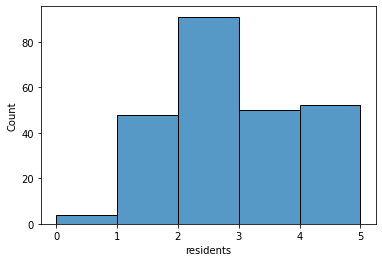

In [48]:
sns.histplot(data=cleaned_df, x='residents', binwidth=1)

plt.show()

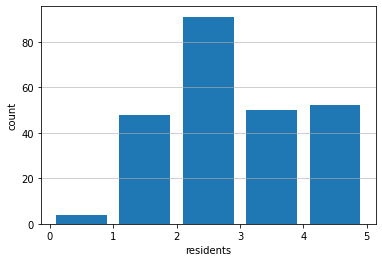

In [ ]:
plt.hist(cleaned_df['residents'], bins=5, rwidth=0.8)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('residents')
plt.ylabel('count')

plt.show()

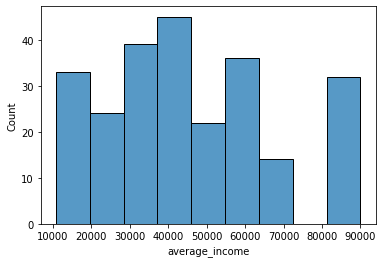

In [ ]:
sns.histplot(data=cleaned_df, x='average_income', bins='auto')

plt.show()

## Box Plots

Box plots are also commonly used to analyse one numerical variable. They show spead of values as well as provide information about symmetry and outliers.

We can use either Seaborn's [boxplot()](https://seaborn.pydata.org/generated/seaborn.boxplot.html) function or Matplotlib's [boxplot()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html) function to plot a box plot as follows.

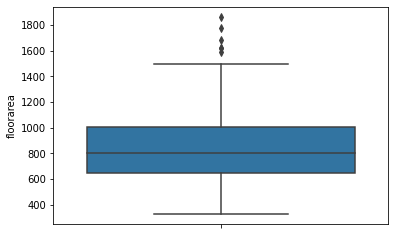

In [ ]:
sns.boxplot(y="floorarea", data=cleaned_df)

plt.show()

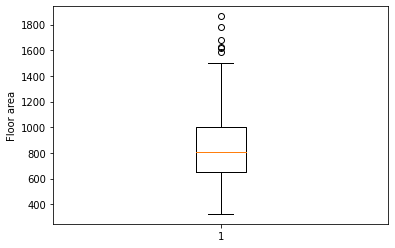

In [ ]:
plt.boxplot(cleaned_df['floorarea'])

plt.ylabel('Floor area')

plt.show()

For comparisons, we can easily plot box plots of floorarea per hometype using Seaborn library.

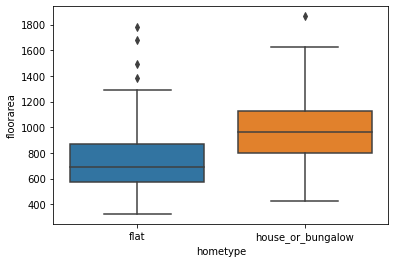

In [ ]:
sns.boxplot(x="hometype", y="floorarea", data=cleaned_df)

plt.show()

## Bar Plots

Bar plots are used to analyse one numerical and categorical variables. This graph presents categorical data using bars with heights proportional to the numerical values each category represents.

Considering the format of our data, Seaborn's [countplot()](https://seaborn.pydata.org/generated/seaborn.countplot.html) function can be easily used to plot bar plots with a few code lines as follows.

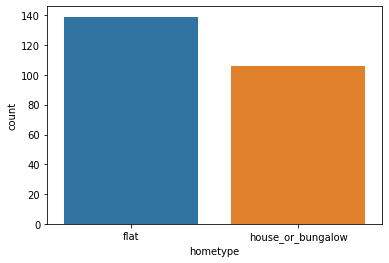

In [ ]:
sns.countplot(x=cleaned_df['hometype'])

plt.show()

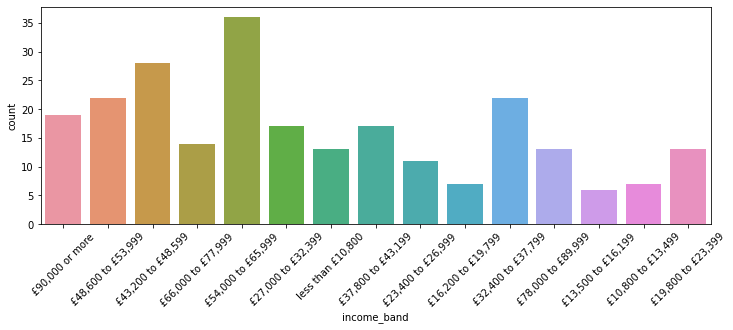

In [ ]:
fig = plt.figure(figsize=(12, 4))  # set figure size
sns.countplot(x=cleaned_df['income_band'])

plt.xticks(rotation=45)  # rotate x axis to overcome overlapping issues
plt.show()

## Scatter Plots

We use scatter plots to analyse two numerical variables. 

We can use either Seaborn's [scatterplot()](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) function or Matplotlib's [scatter()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) function to plot a scatter plot as follows.

It is easy and straighforward to use scatterplot() function, if our data is in a DataFrame. However, to plot from arrays, it is easy to use scatter() function (We will come across such scenarios while working with machine learning models).

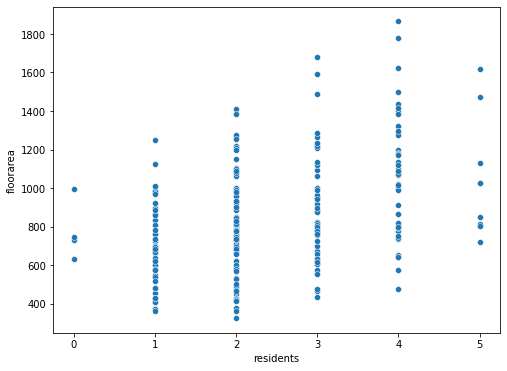

In [ ]:
fig = plt.figure(figsize=(8, 6))
sns.scatterplot(data=cleaned_df, x='residents', y='floorarea')

plt.show()

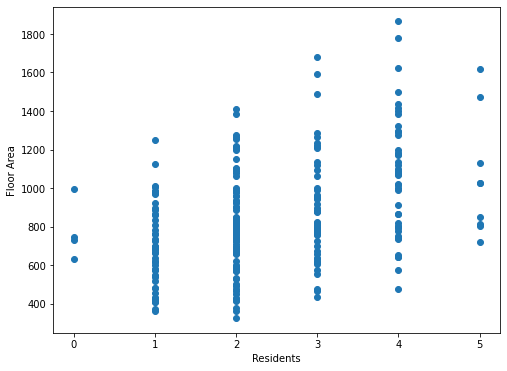

In [ ]:
fig = plt.figure(figsize=(8, 6))

plt.scatter(cleaned_df['residents'], cleaned_df['floorarea'])

plt.xlabel("Residents")
plt.ylabel("Floor Area")
  
plt.show()

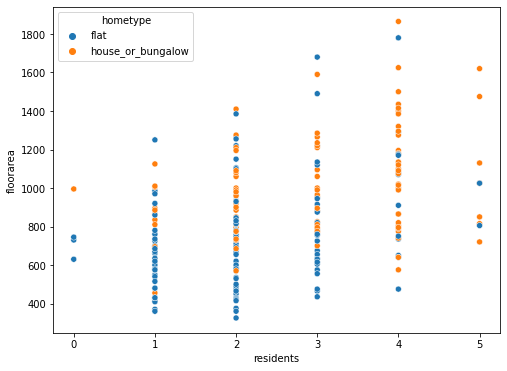

In [ ]:
fig = plt.figure(figsize=(8, 6))
sns.scatterplot(data=cleaned_df, x="residents", y="floorarea", hue="hometype")

plt.show()

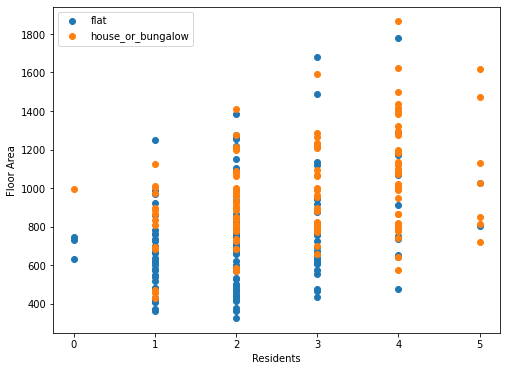

In [ ]:
fig = plt.figure(figsize=(8, 6))

plt.scatter(df.loc[df['hometype'] == 'flat']['residents'], df.loc[df['hometype'] == 'flat']['floorarea'], label = 'flat')
plt.scatter(df.loc[df['hometype'] == 'house_or_bungalow']['residents'], df.loc[df['hometype'] == 'house_or_bungalow']['floorarea'], label = 'house_or_bungalow')

plt.xlabel("Residents")
plt.ylabel("Floor Area")

plt.legend() 
plt.show()